# OVERLAP AND ADD 
I want to test *overlap and add* in **python**.

## ECG Signal
Below we load the ECG signal from .mat file and plot it.

In [1]:
import scipy.io as scipy
import numpy as np
import matplotlib.pyplot as plt

#load the data
mat = scipy.loadmat('data_ecg.mat')

#take the array i REALLY need with [0,:]
ecg = mat['ecg'][0,:] 
#print(ecg,ecg.size)

#ECG signal
x = ecg-ecg.mean(axis=0) 
Nx = x.size
#print('x',x,Nx)

T = 1/125; #sampling period  
tx = np.arange(Nx)*T #time instants associated with x
#print('tx',tx,tx.size)

plt.plot(tx,x)
plt.grid()
plt.xlim([0,20])
plt.xlabel('time[s]')
plt.ylabel('signal x')
plt.title('The ECG signal in the time domain')
plt.show()

<Figure size 640x480 with 1 Axes>

## Filter

[0.    0.008 0.016 0.024 0.032 0.04  0.048 0.056 0.064 0.072 0.08  0.088
 0.096 0.104 0.112 0.12  0.128 0.136 0.144 0.152] 20


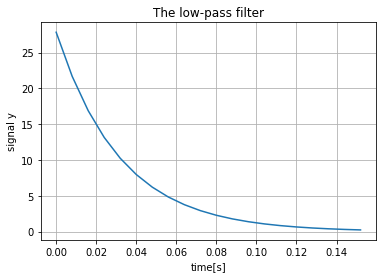

In [2]:
#filter
ty = np.arange(20)*T 
print(ty,ty.size)

y = np.exp(-0.25*ty/T) #exponential signal
y = y/np.sum(y)/T
#print(y,y.size)
Ny = y.size

plt.plot(ty,y)
plt.grid()
plt.xlabel('time[s]')
plt.ylabel('signal y')
plt.title('The low-pass filter')
plt.autoscale()
plt.show()

## Convolution in the frequency domain

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


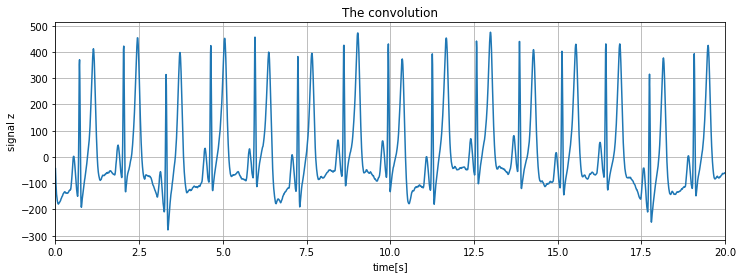

In [3]:
#Cyclic Convolution function 
def cyclic_conv(x,y,T):
    X = np.fft.fft(x)*T
    Y = np.fft.fft(y)*T 
    Z = np.multiply(X,Y)
    z = np.fft.ifft(Z)/T
    return z

x1 = np.concatenate((x,np.zeros((Ny-1))),axis=0)
#print(x1,x1.size)
y1 = np.concatenate((y,np.zeros((Nx-1))),axis=0)
#print(y1,y1.size)
z1 = cyclic_conv(x1,y1,T)
tz = np.arange(tx[0]+ty[0],tx[-1]+ty[-1]+T,T) #start,end,step

plt.figure(figsize=(12,4))
plt.plot(tz,z1)
plt.grid()
plt.xlabel('time[s]')
plt.ylabel('signal z')
plt.title('The convolution')
plt.xlim([0,20])
plt.show()


## Overlap And Add

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


[-4.43512688e+01 -7.80012727e+01 -1.03762523e+02 ...  1.81277544e+00
  5.29703118e-01  1.51195352e-02] 4019


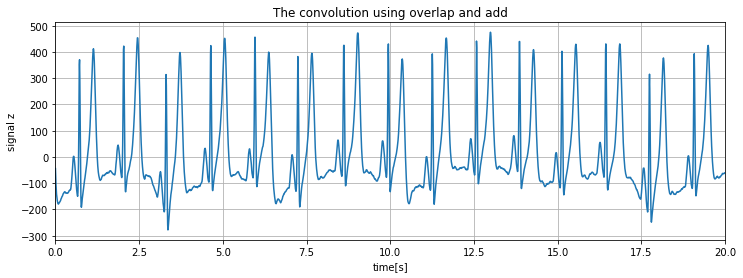

difference of conv versus overlap-and-add =  7.895658532137572e-12


In [15]:
# M = 10*Ny; % block length; it provides 20 blocks since Nx = 20*M

# N = M+Ny-1; % block constant
# z2 = zeros(1,Nx+Ny-1); % prepare an all-zero vector for the output

# for i = 1:Nx/M % cycle per each block
#     b1 = [x((1:M)+(i-1)*M), zeros(1,Ny-1)]; % build block and add zeros
#     y1 = [y, zeros(1,M-1)]; % add zeros to y
#     c1 = cyclic_conv(b1,y1,T); % cyclic convolution via fft 
#                                % (see the function definition below)
#     pos = (i-1)*M+(1:N); % positions of the output vector to update
#     z2(pos) = z2(pos) + c1; % add in the correct place
# end

# disp(['difference of conv versus overlap-and-add = ' num2str(norm(z-z2))])

M = 10*Ny
N = M+Ny-1
z2 = np.zeros(Nx+Ny-1) #all zero vector for output
nblocks = Nx/M #cast int 20 blocks
y1_padded = np.concatenate((y,np.zeros((M-1))),axis=0)
#print(y1_padded.size)

for i in range(0,20):
    increase = (i)*M
    b1 = np.concatenate((x[(0+increase):(M+increase)],np.zeros(Ny-1)),axis=0) 
    #print(i,b1.size)
    c1 = cyclic_conv(b1,y1_padded,T)
    pos = np.arange(0+i*M,i*M+N,1) #start,end,step
    #print(pos,pos.size)
    z2[pos] = z2[pos]+c1 #does this work? yes, looks like it 
    
print(z2,z2.size)

plt.figure(figsize=(12,4))
plt.plot(tz,z2)
plt.grid()
plt.xlabel('time[s]')
plt.ylabel('signal z')
plt.title('The convolution using overlap and add')
plt.xlim([0,20])
plt.show()

print('difference of conv versus overlap-and-add = ', np.linalg.norm(z1-z2))

## Overlap and save
TODO

In [ ]:
# MATLAB SOLUTION CODE
# %% 4. block convolution - overlap and save

# x2 = [zeros(1,Ny-1), x, zeros(1,N)]; % add zeros before and after
# z3 = []; % prepare an empty vector for the output

# for i = 1:length(x2)/M % cycle per each block
#     b1 = x2((1:N)+(i-1)*M); % build block, do not add zeros
#     y1 = [y, zeros(1,M-1)]; % add zeros to y
#     c1 = cyclic_conv(b1,y1,T); % cyclic convolution via fft 
#                                % (see the function definition below)
#     z3 = [z3, c1(Ny:end)]; % append the new output, keep only part of the samples
# end

# z3 = z3(1:Nx+Ny-1); % restrict the vector to the active samples
# disp(['difference of conv versus overlap-and-save = ' num2str(norm(z-z3))])
